# Tartans

## Cairn

The tartan we will be constructing is Cairn. It's pattern string and color codes are given below:

N6 W80 DR4 DB4 DR4 DB12 DR16 DB8 DR16 DB8 DR16 DB4 OG32 DY4 OG32 DB4 DR16 DB8 DR16 DB8 DR16 DB12 DR4 DB4 DR4 W80 N6

W : [224, 224, 224], DR : [136, 0, 0], DB : [32, 32, 96], OG : [92, 100, 40], DY : [232, 192, 0], N : [136, 136, 136]

Here's a link to an image of the tartan: https://rahollis.github.io/_images/Cairn.png

In [22]:
50301462%31

25

You can also input the pattern string and color codes for any tartan by changing both the name and value of the variables below and inputting them into the `show_tartan()` function. Be extra careful with the formatting as certain elements must be stored as strings.

In [23]:
cairn_pattern_string = 'N6 W80 DR4 DB4 DR4 DB12 DR16 DB8 DR16 DB8 DR16 DB4 OG32 DY4 OG32 DB4 DR16 DB8 DR16 DB8 DR16 DB12 DR4 DB4 DR4 W80 N6'

In [24]:
cairn_colors = {
    'W' : [224, 224, 224], 
    'DR' : [136, 0, 0], 
    'DB' : [32, 32, 96], 
    'OG' : [92, 100, 40], 
    'DY' : [232, 192, 0], 
    'N' : [136, 136, 136]
}

## Libaries

The numpy and matplotlib libraries will be used throughout this project.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Pattern String

To begin, we will start by parsing the pattern string into a more usable format. The function `parse_pattern_string` takes in a pattern string as input and outputs tuples each of which contain the corresponding color and width of each stripe of the tartan.

In [26]:
def parse_pattern_string(pattern_string):
    # List to store tuples
    stripes = []
    
    # Split pattern string into list of stripes using the space character as a separation point
    elements = pattern_string.split(' ')
    
    # Loop through each stripe and separate the letter from the number, then store as tuple
    for element in elements:
        letter = ''
        number = ''
        
        # Loop through each character defining each stripe
        for character in element:
            
            # Check if character is a letter, then add to letter list
            if character.isalpha():
                letter += character
                
            # Check if character is a number, then add to letter list
            elif character.isdigit():
                number += character
        
        # Convert number from string to integer to define width of each stripe
        number = int(number)
        
        # Add tuple with the corresponding letter and number of each stripe to stripes list
        stripes.append((letter, number))

    return stripes

In [27]:
parse_pattern_string('N6 W80 DR4 DB4 DR4 DB12')

[('N', 6), ('W', 80), ('DR', 4), ('DB', 4), ('DR', 4), ('DB', 12)]

## Vertical and Horizontal Stripes

We will now create a function to generate vertical and horizontal stripes based on our pattern string.

In [28]:
def stripes(n, colors, pattern_string):
    # Parse the pattern string to get the stripe colors and widths
    stripes = parse_pattern_string(pattern_string)
    
    # Create an array with dimensions (n, n, 3) to represent the tartan
    tartan = np.zeros((n, n, 3))
    
    # Accumulator variable to prevent stripes from overlapping in while loop
    col_index = 0

    # Loop through each stripe
    while col_index < n:
        for color, width in stripes:
            # If the stripe extends beyond the right edge of the tartan, adjust its width so that it doesn't overflow the array
            if col_index + width > n:
                width = n - col_index

            # Set the color values for each stripe using the colors dictionary
            tartan[:, col_index:col_index+width, 0] = colors[color][0]
            tartan[:, col_index:col_index+width, 1] = colors[color][1]
            tartan[:, col_index:col_index+width, 2] = colors[color][2]

            # Update the column index to point to the next stripe
            col_index += width
            
            # If the last stripe reached the right edge of the tartan, exit the loop
            if col_index >= n:
                break

    # Make the tartan values range from 0 to 1
    tartan /= 255
    
    vertical_stripes = tartan
    
    # Transpose the vertical stripes array to get horizontal stripes
    horizontal_stripes = vertical_stripes.transpose((1, 0, 2))
    
    return vertical_stripes, horizontal_stripes

Using the function `stripes()` we will create a new function called `plot_stripes()` to produce an image of the vertical and horizontal stripes.

In [29]:
def plot_stripes(n, colors, pattern_string):
    # Create the vertical and horizontal stripes
    vertical_stripes, horizontal_stripes = stripes(n, colors, pattern_string)
    
    # Create a figure with two subplots
    plt.subplot(1, 2, 1)
    plt.imshow(vertical_stripes)
    plt.title('Vertical Stripes')

    plt.subplot(1, 2, 2)
    plt.imshow(horizontal_stripes)
    plt.title('Horizontal Stripes')

    # Show the plot
    plt.show()

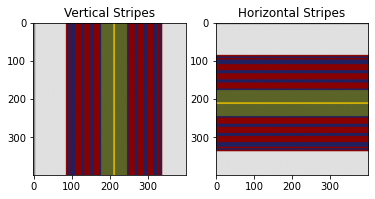

In [30]:
plot_stripes(400, cairn_colors, cairn_pattern_string)

## Stitching Pattern

Now, we will attempt to replicate the stitching pattern used in the production of tartan fabrics.

In [31]:
def show_tartan(n, colors, pattern_string):
    # Get vertical and horizontal stripes using the stripes function
    vertical_stripes, horizontal_stripes = stripes(n, colors, pattern_string)
    
    # Create a 3D numpy array with dimensions (n, n, 3) to represent the tartan
    tartan = np.zeros((n, n, 3))
    
    # Loop through each row and column of the tartan i.e. each pixel
    for row in range(n):
        for col in range(n):
            # Calculate the pattern shift for the current row
            # pattern repeats every 4 pixels, (col + row) % 4 will return values 0,1,2,3 corresponding to pixels to shift pattern
            # iterating through each col and row will result in the appropriate stitching pattern
            pattern_shift = (col + row) % 4
    
            # Check if we should use vertical or horizontal stripes for the current pixel to create an alternating pattern
            if pattern_shift < 2:
                tartan[row, col, :] = vertical_stripes[row, col, :]
            else:
                tartan[row, col, :] = horizontal_stripes[row, col, :]

    plt.imshow(tartan)
    plt.axis('off')

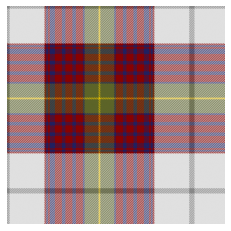

In [32]:
show_tartan(500, cairn_colors, cairn_pattern_string)
plt.show()

## Custom Tartan

The function `show_tartan()` can be used to generate any tartan of any size, here is a custom tartan design:

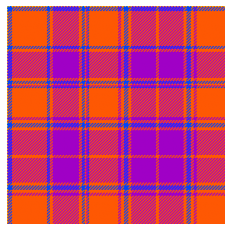

In [33]:
shahed = 'Y1 B6 O48 B4 O4 P36 O4 B4 O2 P2 B2 O40 P4 O4 B6 O4 P34 O4 P34 O4 B6 O4 P4 O40 B2 P2 O2 B4 O4 P36 O4 B4 O48 B6 Y1'
shahed_colors = {
    'B' : [0, 68, 251],
    'P' : [160, 0, 198],
    'Y' : [255, 222, 0],
    'O' : [254, 88, 3]
}

show_tartan(300, shahed_colors, shahed)